# Tutorial for quante_carlo
- <b>quante_carlo</b> is a multiprocess hyperparameter tuning module. 
- This notebook demonstrates how to use this module to determine the number of neurons to use in a pytorch neural network.

In [1]:
cd ../quante_carlo

/home/ec2-user/SageMaker/projects/quante_carlo/quante_carlo


In [2]:
import pandas as pd
import hp_tune
import time
import numpy as np
import multiprocessing as mp
from torch import nn
import neural_network

## This tutorial uses mnist dataset available <a href="https://www.kaggle.com/code/imdevskp/digits-mnist-classification-using-cnn">here</a>

### Multiprocessing
Note to person giving demo:
    <code>gunicorn -w 18 'flask_worker:app'</code>

Included with this repository is a file named worked.py. It's better to put the objective function you want to optimize in a file.
<br> In this example, the worker.py file defines an evaluation function called instance





- The function takes the parameters for each instance from a field defined by the key 'hparameters'.
- The function also returns 1 - loss because the NeuralNetwork is minimizing loss and the Optimizer is set to 'maximize' the function.


### Main 
- The network has 3 hidden layers and the ranges of each layer are as follows: [[32, 512], [32, 1024], [32, 512]],
- Notice that there are 16 gpr processors (Bayesian Optimization step) and 4 GPU processers (training step)
- Because the output layer is a vector of length 10 of ones and zeros we are using BCEWithLogitsLoss.
- I am not using a softmax final function because for prediction, it seems to perform better without one.

In [37]:

gbatch_size = 2000                     # number of elements in the gaussian optimzation batch
g_procs = 4                            # cpus, number of batches for the gaussian optimization phase
hp_ranges = [[32, 512], [32, 1024],    # the user defined function has to determine what to do with
             [32, 512], [.0001, .01]]  # numbers randomly generated from this field
n_procs = 3                            # number of gpus, need to be careful if using all 4, weird things can happen
n_iter = 500                           # bayes iterations
logfile_name = 'logs/logfile_20.txt'


oparameters = {'input_layer_size': 28*28, 
               'output_layer_size': 10, 
               'train_iterations': 30,
               'n_batches': 3,          # number of batches of batch_size for training?
               'batch_size': .04,
               'train_test_files': {'x_train': 'nn_datasets/X_train.csv', 
                                    'x_test': 'nn_datasets/X_train.csv',
                                    'y_train': 'nn_datasets/y_train.csv', 
                                    'y_test': 'nn_datasets/y_test.csv'}}


In [38]:
from importlib import reload
reload(hp_tune)
p.close()

In [45]:
if __name__ == '__main__':
    
    mnist_session = hp_tune.session(neural_network.instance,
                                    hp_ranges=hp_ranges, 
                                    batch_sz=gbatch_size, n_gpr_processors=g_procs, 
                                    n_processors=n_procs, n_iter=n_iter, 
                                    other_parameters = oparameters, log_file=logfile_name, use_qc=False, bo_url='http://localhost:8000')
    p = mp.Pool()
    start = time.time()
    tuning_results  = mnist_session.tune(p)

    print("{} total seconds".format(round(time.time() - start,2)))
    p.close()


500 out of 500 
Seconds getting next points 16.7238,  Seconds testing next points 2.72 Current best accuracy: 0.9257
5324.09 total seconds


In [44]:
summary = mnist_session.summary()
summary[summary['score']>.92]

,iteration,score,hparameters,qEi
912,304,0.920067,"(484, 706, 350, 0.009676102404125076)",0.033965
942,314,0.920199,"(468, 837, 387, 0.009976380191228673)",0.032116
950,316,0.924422,"(480, 994, 490, 0.009207002703678462)",0.031207
993,331,0.920866,"(508, 970, 412, 0.009980875794950756)",0.029528
1004,334,0.920764,"(506, 1022, 299, 0.008887637120081391)",0.030633
1015,338,0.920033,"(479, 873, 367, 0.009139440470525886)",0.033226
1022,340,0.920302,"(501, 974, 477, 0.008631786311313023)",0.026423
1025,341,0.928753,"(509, 1018, 439, 0.009910429626480097)",0.032547
1026,342,0.920692,"(473, 1016, 498, 0.00964110960036519)",0.032074
1042,347,0.923885,"(497, 1024, 465, 0.009281597309515256)",0.039230


In [7]:
import matplotlib.pyplot as plt

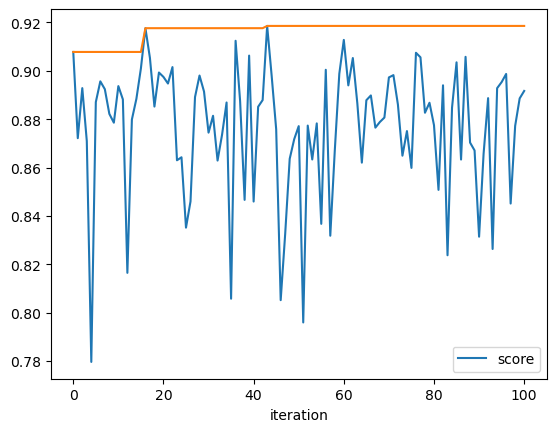

In [8]:
n = summary[['score', 'iteration']].groupby('iteration').max().plot()
best = [max(summary[summary['iteration']<=i]['score']) for i in range(n_iter+1)]
p = plt.plot(best)
plt.savefig('hptune4.png')

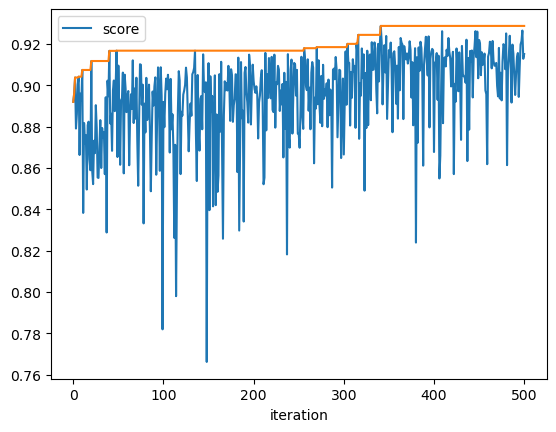

In [42]:
n = summary[['score', 'iteration']].groupby('iteration').max().plot()
best = [max(summary[summary['iteration']<=i]['score']) for i in range(n_iter+1)]
p = plt.plot(best)
plt.savefig('hptune_11152024.png')

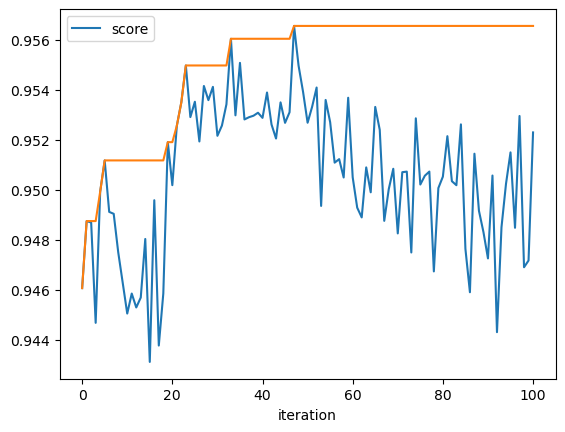

In [12]:
n = summary[['score', 'iteration']].groupby('iteration').max().plot()
best = [max(summary[summary['iteration']<=i]['score']) for i in range(n_iter+1)]
p = plt.plot(best)
plt.savefig('hptune.png')

In [13]:
import neptune
run = neptune.init_run(
    project="mshipman/HPTune",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzNzhiNTgwMC05MDAzLTQ4NTQtOTk1NC04YWFlN2JkMDg4NWEifQ==",
)

summary.to_csv("summary.csv", index=False)
run["summary/score_history.csv"].upload("summary.csv")

params = {"limits": '('+') ('.join(["{},{}".format(x[0], x[1]) for x in hp_ranges])+')', 
          "gpr_batch_size": gbatch_size,
          "n_gpr_processors": g_procs, "n_processors": n_procs,
          "n_iterations": n_iter, "other_parameters": oparameters}
run["parameters"] = params
run["summary/best_by_iteration.png"].upload("hptune.png")
run['historical/best'] = ','.join([str(x) for x in best])
run["log"].upload(logfile_name)
run.stop()


ModuleNotFoundError: No module named 'neptune'